# Data Cleaning on Udemy Dataset

#### Importing the necessary libraries

In [254]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing the dataset

In [255]:
df = pd.read_csv('data.csv')
df.head(5)

,course_name,instructor,course url,course image,course description,reviews_avg,reviews_count,course_duration,lectures_count,level,price_after_discount,main_price,course_flag,students_count,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,https://www.udemy.com/course/complete-python-b...,https://img-b.udemycdn.com/course/240x135/5678...,Learn Python like a Professional Start from t...,Rating: 4.6 out of 5,440383 reviews,22 total hours,155 lectures,All Levels,Current price: E£319.99,"Original price: E£1,399.99",NaN,"1,629,692 students",NaN,NaN,NaN,NaN
1,The Web Developer Bootcamp 2022,Colt Steele,https://www.udemy.com/course/the-web-developer...,https://img-b.udemycdn.com/course/240x135/6252...,COMPLETELY REDONE - The only course you need t...,Rating: 4.7 out of 5,248508 reviews,64 total hours,615 lectures,All Levels,Current price: E£269.99,"Original price: E£1,399.99",NaN,"830,559 students",NaN,NaN,NaN,NaN
2,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,https://www.udemy.com/course/the-complete-web-...,https://img-b.udemycdn.com/course/240x135/1565...,Become a Full-Stack Web Developer with just ON...,Rating: 4.7 out of 5,234837 reviews,65.5 total hours,490 lectures,All Levels,Current price: E£349.99,"Original price: E£1,699.99",Bestseller,"794,897 students",NaN,NaN,NaN,NaN
3,Angular - The Complete Guide (2023 Edition),Maximilian Schwarzmüller,https://www.udemy.com/course/the-complete-guid...,https://img-b.udemycdn.com/course/240x135/7561...,"Master Angular 14 (formerly ""Angular 2"") and b...",Rating: 4.6 out of 5,174576 reviews,34.5 total hours,472 lectures,All Levels,Current price: E£319.99,"Original price: E£1,599.99",Bestseller,"634,196 students",NaN,NaN,NaN,NaN
4,Java Programming Masterclass covering Java 11 ...,"Tim Buchalka, Tim Buchalka's Learn Programming...",https://www.udemy.com/course/java-the-complete...,https://img-b.udemycdn.com/course/240x135/5336...,Learn Java In This Course And Become a Compute...,Rating: 4.5 out of 5,171838 reviews,80.5 total hours,401 lectures,All Levels,Current price: E£349.99,Original price: E£849.99,Bestseller,"727,934 students",NaN,NaN,NaN,NaN


#### Lets get the basic information about the dataset

In [256]:
df.shape

(5027, 18)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5027 entries, 0 to 5026
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   course_name           5013 non-null   object
 1   instructor            5016 non-null   object
 2   course url            5020 non-null   object
 3   course image          5017 non-null   object
 4   course description    5016 non-null   object
 5   reviews_avg           5017 non-null   object
 6   reviews_count         5017 non-null   object
 7   course_duration       5017 non-null   object
 8   lectures_count        5017 non-null   object
 9   level                 5017 non-null   object
 10  price_after_discount  5017 non-null   object
 11  main_price            4799 non-null   object
 12  course_flag           518 non-null    object
 13  students_count        5013 non-null   object
 14  Unnamed: 14           3 non-null      object
 15  Unnamed: 15           1 non-null      

In [258]:
df.describe()

,course_name,instructor,course url,course image,course description,reviews_avg,reviews_count,course_duration,lectures_count,level,price_after_discount,main_price,course_flag,students_count,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,5013,5016,5020,5017,5016,5017,5017,5017,5017,5017,5017,4799,518,5013,3,1,1,1
unique,4975,2131,5000,4913,4967,33,1962,196,455,10,32,32,3,4397,3,1,1,1
top,Python for Beginners,Packt Publishing,https://www.udemy.com/course/build-apps-with-r...,"data:image/svg+xml,%3Csvg xmlns=""http://www.w3...",Learn Xamarin Forms Real World Application Fro...,Rating: 4.6 out of 5,129 reviews,2.5 total hours,32 lectures,All Levels,Current price: E£269.99,Original price: E£229.99,Bestseller,"1,136 students","E£1,399.99","1,982 students",Devops Fundamentals - CI/CD with AWS +Docker+A...,"24,712 students"
freq,3,91,2,89,4,732,31,269,69,2687,2150,838,516,5,1,1,1,1


#### From the initail findings we get
* we have 5027 rows and 18 columns
* we have numerical values in the dataset but it shows no numerical values in the dataset 

#### My initial step of analysis  is basically 
* removing unwanted columns 
* finding out the null values
* finding if the outliers exists in a dataset or not
* filling the null values with correct measure of central tendency based on the distribution of data 
* Changing the datatype of columns if required
* prepare the dataset for visualization 

##### Removing unwanted columns

In [259]:
unwanted_columns = ['Unnamed: 17','Unnamed: 16','Unnamed: 15','Unnamed: 14','course_flag','course url','course image','course description']

In [260]:
df = df.drop(columns=unwanted_columns)

In [261]:
df.head(5)

,course_name,instructor,reviews_avg,reviews_count,course_duration,lectures_count,level,price_after_discount,main_price,students_count
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,Rating: 4.6 out of 5,440383 reviews,22 total hours,155 lectures,All Levels,Current price: E£319.99,"Original price: E£1,399.99","1,629,692 students"
1,The Web Developer Bootcamp 2022,Colt Steele,Rating: 4.7 out of 5,248508 reviews,64 total hours,615 lectures,All Levels,Current price: E£269.99,"Original price: E£1,399.99","830,559 students"
2,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,Rating: 4.7 out of 5,234837 reviews,65.5 total hours,490 lectures,All Levels,Current price: E£349.99,"Original price: E£1,699.99","794,897 students"
3,Angular - The Complete Guide (2023 Edition),Maximilian Schwarzmüller,Rating: 4.6 out of 5,174576 reviews,34.5 total hours,472 lectures,All Levels,Current price: E£319.99,"Original price: E£1,599.99","634,196 students"
4,Java Programming Masterclass covering Java 11 ...,"Tim Buchalka, Tim Buchalka's Learn Programming...",Rating: 4.5 out of 5,171838 reviews,80.5 total hours,401 lectures,All Levels,Current price: E£349.99,Original price: E£849.99,"727,934 students"


##### we dropped 8 columns in total as it has no relevance to the analysis or just contained too many null values 

###### Lets transform the columns we will follow the steps mentioned below for every numerical column 
* check the type of values in the column using value_counts
* Remove values that are not numerical in nature 
* replace the common occuring values wioth suitable values using str.replace()
* convert the column to float or int datatype depending on the needs
* Check for null values in the column
* plot histogram and boxplots for distribution and outlier detection 
* Replace the null values with suitable measure of central tendency

### Lets start with " reviews_avg " column

######  check the type of values in the column using value_counts

In [262]:
df['reviews_avg'].value_counts()

Rating: 4.6 out of 5                                                                                                     732
Rating: 4.5 out of 5                                                                                                     728
Rating: 4.4 out of 5                                                                                                     641
Rating: 4.3 out of 5                                                                                                     486
Rating: 4.7 out of 5                                                                                                     432
Rating: 4.2 out of 5                                                                                                     365
Rating: 4.1 out of 5                                                                                                     286
Rating: 4.8 out of 5                                                                                                     233


##### Removing the values that are not numerical in nature

In [263]:
df[df['reviews_avg']=='https://img-b.udemycdn.com/course/240x135/368679_cd44_3.jpg']

,course_name,instructor,reviews_avg,reviews_count,course_duration,lectures_count,level,price_after_discount,main_price,students_count
3507,E£629.99,Current price: E£269.99,https://img-b.udemycdn.com/course/240x135/3686...,"Master Magento's modular framework, from insta...",Rating: 4.2 out of 5,235 reviews,3.5 total hours,40 lectures,All Levels,NaN


In [264]:
df[df['reviews_avg']=='399.99"']

,course_name,instructor,reviews_avg,reviews_count,course_duration,lectures_count,level,price_after_discount,main_price,students_count
501,"(3,449)",58 lectures,"399.99""",https://www.udemy.com/course/devops-fundamenta...,https://img-b.udemycdn.com/course/240x135/3236...,Step by step Practical course to Automate Cont...,Rating: 4.5 out of 5,3449 reviews,9 total hours,E£269.99


In [265]:
df[df['reviews_avg']=='Beginner guide to Git, Github and Github Action. Learn to use git commands and create Github actions for DevOps CI CD']

,course_name,instructor,reviews_avg,reviews_count,course_duration,lectures_count,level,price_after_discount,main_price,students_count
5010,NaN,NaN,"Beginner guide to Git, Github and Github Actio...",Rating: 3.6 out of 5,124 reviews,1.5 total hours,22 lectures,All Levels,Current price: E£229.99,"Learn Git, Github and Github Actions for DevOp..."


In [266]:
rows_to_be_dropped = [5010,501,3507]

In [267]:
df = df.drop(rows_to_be_dropped)

In [268]:
df['reviews_avg'].value_counts()

Rating: 4.6 out of 5    732
Rating: 4.5 out of 5    728
Rating: 4.4 out of 5    641
Rating: 4.3 out of 5    486
Rating: 4.7 out of 5    432
Rating: 4.2 out of 5    365
Rating: 4.1 out of 5    286
Rating: 4.8 out of 5    233
Rating: 4.0 out of 5    227
Rating: 3.9 out of 5    170
Rating: 3.8 out of 5    149
Rating: 3.7 out of 5    112
Rating: 3.6 out of 5    101
Rating: 3.5 out of 5     71
Rating: 4.9 out of 5     68
Rating: 3.4 out of 5     62
Rating: 3.3 out of 5     38
Rating: 3.2 out of 5     31
Rating: 3.1 out of 5     21
Rating: 3.0 out of 5     14
Rating: 2.9 out of 5     11
Rating: 2.8 out of 5      8
Rating: 5.0 out of 5      7
Rating: 2.6 out of 5      6
Rating: 2.4 out of 5      5
Rating: 2.7 out of 5      4
Rating: 2.5 out of 5      3
Rating: 2.1 out of 5      1
Rating: 1.9 out of 5      1
Rating: 1.7 out of 5      1
Name: reviews_avg, dtype: int64

##### Replace the common occuring values with suitable values using str.replace()

In [269]:
df['reviews_avg'] = df['reviews_avg'].str.replace('Rating: ','')

In [270]:
df['reviews_avg'] = df['reviews_avg'].str.replace(' out of 5','')

In [271]:
df['reviews_avg'].value_counts()

4.6    732
4.5    728
4.4    641
4.3    486
4.7    432
4.2    365
4.1    286
4.8    233
4.0    227
3.9    170
3.8    149
3.7    112
3.6    101
3.5     71
4.9     68
3.4     62
3.3     38
3.2     31
3.1     21
3.0     14
2.9     11
2.8      8
5.0      7
2.6      6
2.4      5
2.7      4
2.5      3
2.1      1
1.9      1
1.7      1
Name: reviews_avg, dtype: int64

##### convert the column to float or int datatype depending on the needs

In [272]:
df['reviews_avg'] = df['reviews_avg'].astype(float)

##### Check for null values in the column

In [273]:
df.reviews_avg.isna().sum()

10

##### Plot histogram and boxplots for distribution and outlier detection

<Axes: xlabel='reviews_avg', ylabel='Count'>

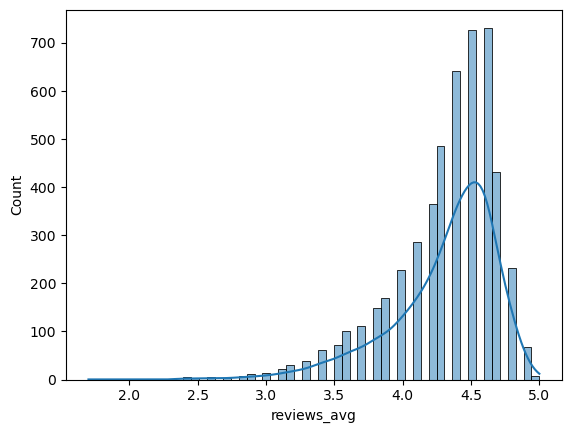

In [274]:
sns.histplot(data=df['reviews_avg'],kde=True)

the distribution is skewed hence the mean is affected by an extreme value or outlier hence we will plot a boxplot to see if any outlier exists or not 

<Axes: >

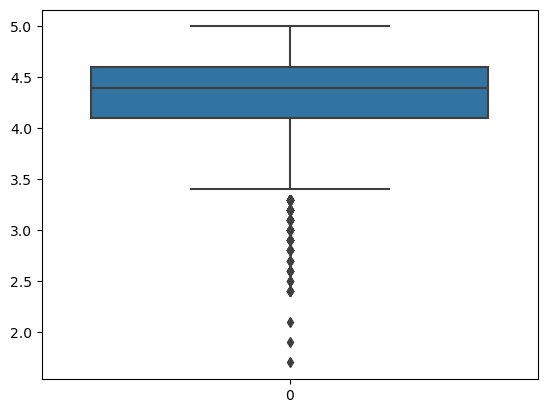

In [275]:
sns.boxplot(data=df['reviews_avg'])

There are no outliers present and the datapoints we see in the boxplot are nothing but true outliers

In [276]:
reviews_avg_median = df['reviews_avg'].median()
print(reviews_avg_median)

4.4


In [277]:
df['reviews_avg'].fillna(reviews_avg_median, inplace=True)

In [278]:
df.isnull().sum()

course_name              13
instructor               10
reviews_avg               0
reviews_count            10
course_duration          10
lectures_count           10
level                    10
price_after_discount     10
main_price              228
students_count           13
dtype: int64

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 0 to 5026
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   course_name           5011 non-null   object 
 1   instructor            5014 non-null   object 
 2   reviews_avg           5024 non-null   float64
 3   reviews_count         5014 non-null   object 
 4   course_duration       5014 non-null   object 
 5   lectures_count        5014 non-null   object 
 6   level                 5014 non-null   object 
 7   price_after_discount  5014 non-null   object 
 8   main_price            4796 non-null   object 
 9   students_count        5011 non-null   object 
dtypes: float64(1), object(9)
memory usage: 560.8+ KB


#### As we can we successfully completed all the steps and we completely transformed our " reviews_avg " column succesfully

In [280]:
df.head()

,course_name,instructor,reviews_avg,reviews_count,course_duration,lectures_count,level,price_after_discount,main_price,students_count
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,4.6,440383 reviews,22 total hours,155 lectures,All Levels,Current price: E£319.99,"Original price: E£1,399.99","1,629,692 students"
1,The Web Developer Bootcamp 2022,Colt Steele,4.7,248508 reviews,64 total hours,615 lectures,All Levels,Current price: E£269.99,"Original price: E£1,399.99","830,559 students"
2,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,4.7,234837 reviews,65.5 total hours,490 lectures,All Levels,Current price: E£349.99,"Original price: E£1,699.99","794,897 students"
3,Angular - The Complete Guide (2023 Edition),Maximilian Schwarzmüller,4.6,174576 reviews,34.5 total hours,472 lectures,All Levels,Current price: E£319.99,"Original price: E£1,599.99","634,196 students"
4,Java Programming Masterclass covering Java 11 ...,"Tim Buchalka, Tim Buchalka's Learn Programming...",4.5,171838 reviews,80.5 total hours,401 lectures,All Levels,Current price: E£349.99,Original price: E£849.99,"727,934 students"


##### Lets move to ' review_count ' columnm

In [281]:
df['reviews_count'].value_counts()

129 reviews     31
138 reviews     27
128 reviews     27
139 reviews     27
125 reviews     26
                ..
2488 reviews     1
2495 reviews     1
2500 reviews     1
2501 reviews     1
1395 reviews     1
Name: reviews_count, Length: 1959, dtype: int64

In [282]:
df['reviews_count'] = df['reviews_count'].str.replace('reviews','')

In [283]:
df['reviews_count'].value_counts()

129      31
138      27
128      27
139      27
125      26
         ..
2488      1
2495      1
2500      1
2501      1
1395      1
Name: reviews_count, Length: 1959, dtype: int64

##### convert the column to float or int datatype depending on the needs

In [284]:
df['reviews_count'] = df['reviews_count'].astype(float)

##### Check for null values in the column

In [285]:
df.reviews_count.isna().sum()

10

##### Plot histogram and boxplots for distribution and outlier detection

<Axes: xlabel='reviews_count', ylabel='Count'>

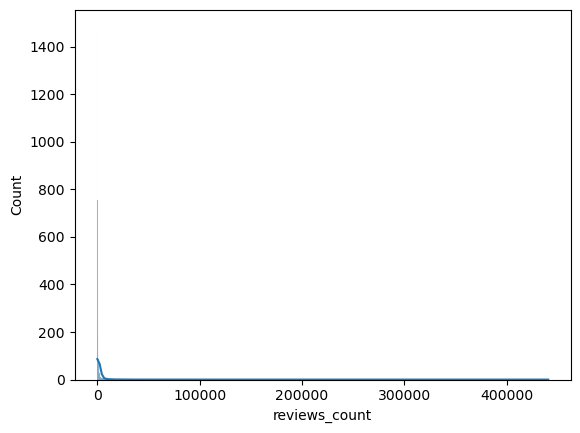

In [286]:
sns.histplot(data=df['reviews_count'],kde=True)

<Axes: >

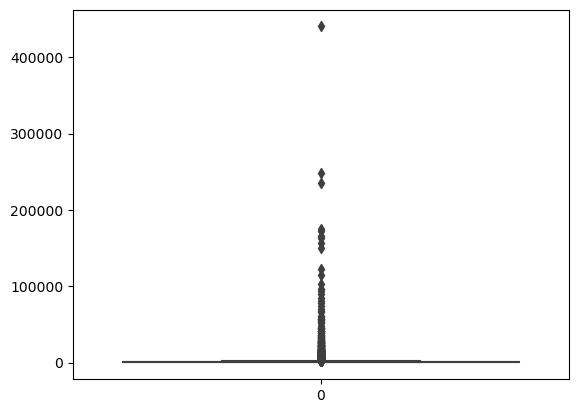

In [287]:
sns.boxplot(data=df['reviews_count'])

* There are no outliers present and the datapoints we see in the boxplot are nothing but true outliers
popular courses have more reviews more students that are enrolled in the course hence higher count of review count 

In [288]:
reviews_count_median = df['reviews_count'].median()
print(reviews_avg_median)

4.4


##### Replacing null values with median as distribution is skewed

In [289]:
df['reviews_count'].fillna(reviews_count_median, inplace=True)

In [290]:
df.isnull().sum()

course_name              13
instructor               10
reviews_avg               0
reviews_count             0
course_duration          10
lectures_count           10
level                    10
price_after_discount     10
main_price              228
students_count           13
dtype: int64

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 0 to 5026
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   course_name           5011 non-null   object 
 1   instructor            5014 non-null   object 
 2   reviews_avg           5024 non-null   float64
 3   reviews_count         5024 non-null   float64
 4   course_duration       5014 non-null   object 
 5   lectures_count        5014 non-null   object 
 6   level                 5014 non-null   object 
 7   price_after_discount  5014 non-null   object 
 8   main_price            4796 non-null   object 
 9   students_count        5011 non-null   object 
dtypes: float64(2), object(8)
memory usage: 560.8+ KB


### Lets start with " price_after_discount  " column

######  check the type of values in the column using value_counts

In [292]:
df['price_after_discount'].value_counts()

Current price: E£269.99       2150
Current price: E£229.99       1323
Current price: E£199.99        838
Current price: E£319.99        517
Current price: E£349.99         51
Current price: E£479.99         25
Current price: E£1,199.99       13
Current price: E£719.99         11
Current price: E£1,299.99        9
Current price: E£619.99          7
Current price: E£1,399.99        7
Current price: E£419.99          6
Original price: E£229.99         6
Current price: E£449.99          6
Current price: E£779.99          5
Current price: E£799.99          5
Current price: E£1,699.99        5
Current price: E£1,599.99        5
Original price: E£319.99         4
Current price: E£679.99          4
Current price: E£519.99          3
Current price: E£849.99          3
Current price: E£999.99          2
Current price: E£749.99          2
Current price: E£529.99          2
Current price: E£579.99          2
Original price: E£1,199.99       1
Current price: E£649.99          1
Current price: E£599

##### replace the common occuring values wioth suitable values using str.replace()

In [293]:
df['price_after_discount'] = df['price_after_discount'].str.replace('Current price: E£','')

In [294]:
df['price_after_discount'] = df['price_after_discount'].str.replace('Original price: E£','')

In [295]:
df['price_after_discount'] = df['price_after_discount'].str.replace(',','')

##### Converting the object type to float

In [296]:
df['price_after_discount'] = df['price_after_discount'].astype(float)

##### Checking for null values in the column

In [297]:
df['price_after_discount'].isna().sum()

10

##### Plotting the histogram and boxplot for distribution and outlier detection

<Axes: xlabel='price_after_discount', ylabel='Count'>

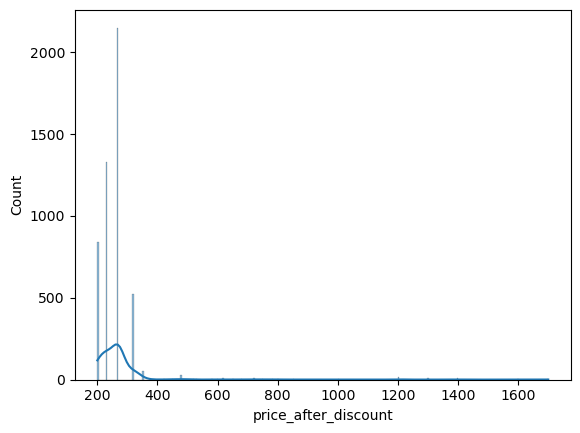

In [298]:
sns.histplot(df['price_after_discount'],kde=True)

<Axes: >

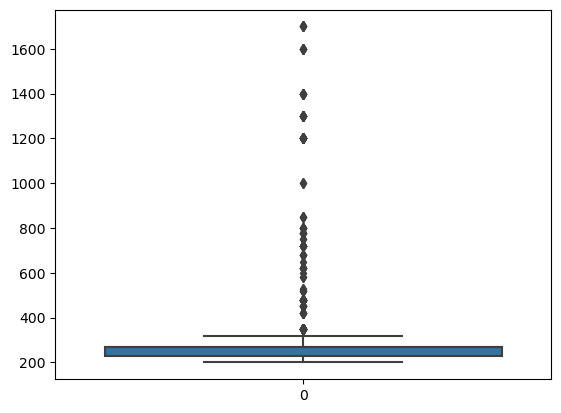

In [299]:
sns.boxplot(df['price_after_discount'])

##### As the distribution is not normal hence we are going to use median

In [300]:
price_after_discount_median = df['price_after_discount'].median()
print(price_after_discount_median)

269.99


In [301]:
df['price_after_discount'].fillna(price_after_discount_median, inplace=True)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 0 to 5026
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   course_name           5011 non-null   object 
 1   instructor            5014 non-null   object 
 2   reviews_avg           5024 non-null   float64
 3   reviews_count         5024 non-null   float64
 4   course_duration       5014 non-null   object 
 5   lectures_count        5014 non-null   object 
 6   level                 5014 non-null   object 
 7   price_after_discount  5024 non-null   float64
 8   main_price            4796 non-null   object 
 9   students_count        5011 non-null   object 
dtypes: float64(3), object(7)
memory usage: 560.8+ KB


### Lets start with " main_price " column

##### check the type of values in the column using value_counts

In [303]:
df['main_price'].value_counts()

Original price: E£229.99      838
Original price: E£1,299.99    532
Original price: E£719.99      506
Original price: E£1,199.99    451
Original price: E£1,399.99    394
Original price: E£479.99      270
Original price: E£319.99      198
Original price: E£849.99      172
Original price: E£269.99      142
Original price: E£419.99      123
Original price: E£1,599.99    115
Original price: E£679.99       92
Original price: E£349.99       84
Original price: E£779.99       84
Original price: E£529.99       83
Original price: E£749.99       79
Original price: E£649.99       69
Original price: E£799.99       66
Original price: E£599.99       66
Original price: E£619.99       63
Original price: E£819.99       61
Original price: E£629.99       49
Original price: E£579.99       45
Original price: E£729.99       43
Original price: E£449.99       42
Original price: E£999.99       41
Original price: E£1,699.99     31
Original price: E£519.99       31
Original price: E£549.99       26
Name: main_pri

##### replace the common occuring values wioth suitable values using str.replace()

In [304]:
df['main_price']= df['main_price'].str.replace('Original price: E£','')

In [305]:
df['main_price']= df['main_price'].str.replace(',','')

In [306]:
df['main_price'].value_counts()

229.99     838
1299.99    532
719.99     506
1199.99    451
1399.99    394
479.99     270
319.99     198
849.99     172
269.99     142
419.99     123
1599.99    115
679.99      92
349.99      84
779.99      84
529.99      83
749.99      79
649.99      69
799.99      66
599.99      66
619.99      63
819.99      61
629.99      49
579.99      45
729.99      43
449.99      42
999.99      41
1699.99     31
519.99      31
549.99      26
Name: main_price, dtype: int64

##### Changing the datatype of ' main_price ' column

In [307]:
df['main_price'] = df['main_price'].astype(float)

##### Checking for null values 

In [308]:
df['main_price'].isna().sum()

228

* There are 228 null values 

##### plotting the histogram and boxplot for distribution and outlier detection

<Axes: xlabel='main_price', ylabel='Count'>

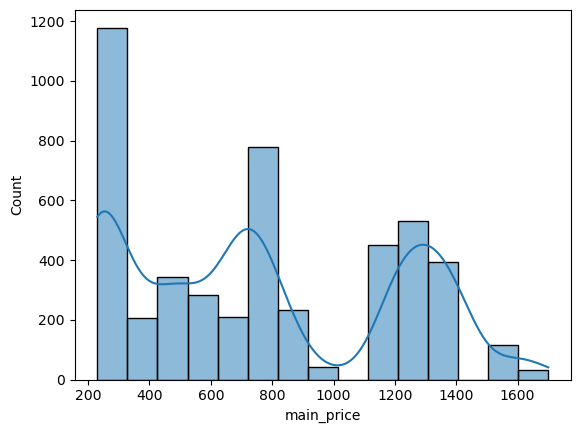

In [309]:
sns.histplot(df['main_price'],kde=True)

<Axes: >

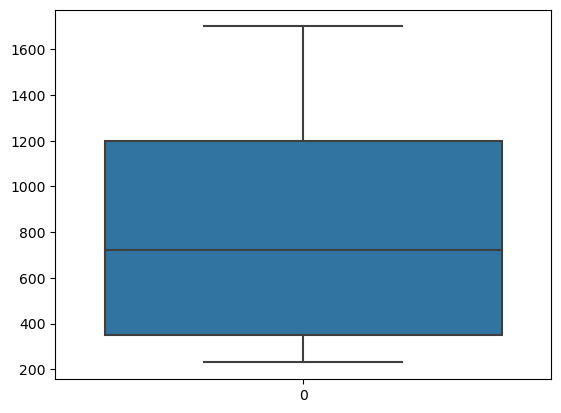

In [310]:
sns.boxplot(df['main_price'])

* There are no outlier true or otherwise hence we will use mean

##### Replacing null values with appropriate measure of central tendency 

In [311]:
main_price_mean = df['main_price'].mean()
main_price_mean

765.8469641367806

In [312]:
df['main_price'].fillna(main_price_mean,inplace=True)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 0 to 5026
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   course_name           5011 non-null   object 
 1   instructor            5014 non-null   object 
 2   reviews_avg           5024 non-null   float64
 3   reviews_count         5024 non-null   float64
 4   course_duration       5014 non-null   object 
 5   lectures_count        5014 non-null   object 
 6   level                 5014 non-null   object 
 7   price_after_discount  5024 non-null   float64
 8   main_price            5024 non-null   float64
 9   students_count        5011 non-null   object 
dtypes: float64(4), object(6)
memory usage: 560.8+ KB


In [314]:
df.isnull().sum()

course_name             13
instructor              10
reviews_avg              0
reviews_count            0
course_duration         10
lectures_count          10
level                   10
price_after_discount     0
main_price               0
students_count          13
dtype: int64

#### Drop the null values in ' course_name ' and ' instructor ' column as they have unique values and i cannot find a way other than replace them will ' unknown ' hence dropping those columns

In [315]:
df = df.dropna(subset=['course_name', 'instructor'])

In [316]:
df.isnull().sum()

course_name             0
instructor              0
reviews_avg             0
reviews_count           0
course_duration         0
lectures_count          0
level                   0
price_after_discount    0
main_price              0
students_count          0
dtype: int64

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5025
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   course_name           5011 non-null   object 
 1   instructor            5011 non-null   object 
 2   reviews_avg           5011 non-null   float64
 3   reviews_count         5011 non-null   float64
 4   course_duration       5011 non-null   object 
 5   lectures_count        5011 non-null   object 
 6   level                 5011 non-null   object 
 7   price_after_discount  5011 non-null   float64
 8   main_price            5011 non-null   float64
 9   students_count        5011 non-null   object 
dtypes: float64(4), object(6)
memory usage: 430.6+ KB


## Conclusion
* we used the described steps to transform columns which include 'reviews_avg', 'reviews_count','price_after_discount','main_price'
* convertde columns to different datatypes 
* dropped extra characters from the columns for a more clear and concise data
* drop specific rows to get the desired values in the columns
* plotted histograms and boxplot for distribution and outlier detection 
* replaced null values with measure of central tendency based on the above plots 


In [253]:
df.to_csv('cleaned_udemy.csv')